# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Ход исследования

* ознакомиться с данными 

* провести предобработку данных и изучить каждый столбец данных.

* изменить тип данных в зависимости от надобности 

* странить не явные дубликаты 

* выявить аномалии

* провести исследовательский анализ данных 

* сделать вывод



# Описание данных 

* 		airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* 		balcony — число балконов
* 		ceiling_height — высота потолков (м)
* 		cityCenters_nearest — расстояние до центра города (м)
* 		days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* 		first_day_exposition — дата публикации
* 		floor — этаж
* 		floors_total — всего этажей в доме
* 		is_apartment — апартаменты (булев тип)
* 		kitchen_area — площадь кухни в квадратных метрах (м²)
* 		last_price — цена на момент снятия с публикации
* 		living_area — жилая площадь в квадратных метрах (м²)
* 		locality_name — название населённого пункта
* 		open_plan — свободная планировка (булев тип)
* 		parks_around3000 — число парков в радиусе 3 км
* 		parks_nearest — расстояние до ближайшего парка (м)
* 		ponds_around3000 — число водоёмов в радиусе 3 км
* 		ponds_nearest — расстояние до ближайшего водоёма (м)
* 		rooms — число комнат
* 		studio — квартира-студия (булев тип)
* 		total_area — общая площадь квартиры в квадратных метрах (м²)
* 		total_images — число фотографий квартиры в объявлении


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn 
data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv',sep = '\t')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.tail(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
16977,14,8300000.0,63.0,2018-03-29T00:00:00,2,2.80,18.0,39.6,13,NaN,...,13.0,5.0,Санкт-Петербург,45596.0,14296.0,1.0,401.0,0.0,NaN,6.0
8038,20,64500000.0,300.0,2017-09-29T00:00:00,6,NaN,5.0,150.0,5,NaN,...,20.0,NaN,Санкт-Петербург,24825.0,5509.0,0.0,NaN,0.0,NaN,468.0
2646,16,5300000.0,47.2,2016-02-13T00:00:00,1,2.70,9.0,18.9,7,False,...,13.2,1.0,Санкт-Петербург,48152.0,16785.0,0.0,NaN,0.0,NaN,148.0
21239,6,2100000.0,31.0,2018-06-20T00:00:00,1,2.56,3.0,15.0,3,NaN,...,5.1,NaN,Колпино,30391.0,32103.0,0.0,NaN,1.0,749.0,51.0
7540,20,4500000.0,61.1,2016-05-27T00:00:00,2,2.50,5.0,35.1,2,NaN,...,10.7,NaN,поселок городского типа Рощино,NaN,NaN,NaN,NaN,NaN,NaN,668.0
5329,20,6600000.0,58.7,2018-02-07T00:00:00,2,2.81,4.0,27.5,3,NaN,...,9.7,NaN,Санкт-Петербург,19609.0,3907.0,0.0,NaN,3.0,454.0,272.0
3799,9,5295000.0,53.7,2018-03-20T00:00:00,1,NaN,26.0,28.0,17,NaN,...,14.3,1.0,Санкт-Петербург,45469.0,18194.0,0.0,NaN,0.0,NaN,21.0
7396,19,7200000.0,59.0,2018-03-14T00:00:00,2,2.53,14.0,29.5,1,NaN,...,12.6,NaN,Санкт-Петербург,28976.0,11150.0,0.0,NaN,0.0,NaN,352.0
17221,20,25000000.0,180.0,2018-09-11T00:00:00,4,2.73,10.0,90.0,5,NaN,...,17.3,NaN,Санкт-Петербург,52036.0,14479.0,0.0,NaN,2.0,711.0,161.0
21103,8,3300000.0,31.2,2018-02-03T00:00:00,1,2.50,9.0,18.0,1,NaN,...,8.4,NaN,Санкт-Петербург,35373.0,10203.0,1.0,680.0,1.0,167.0,45.0


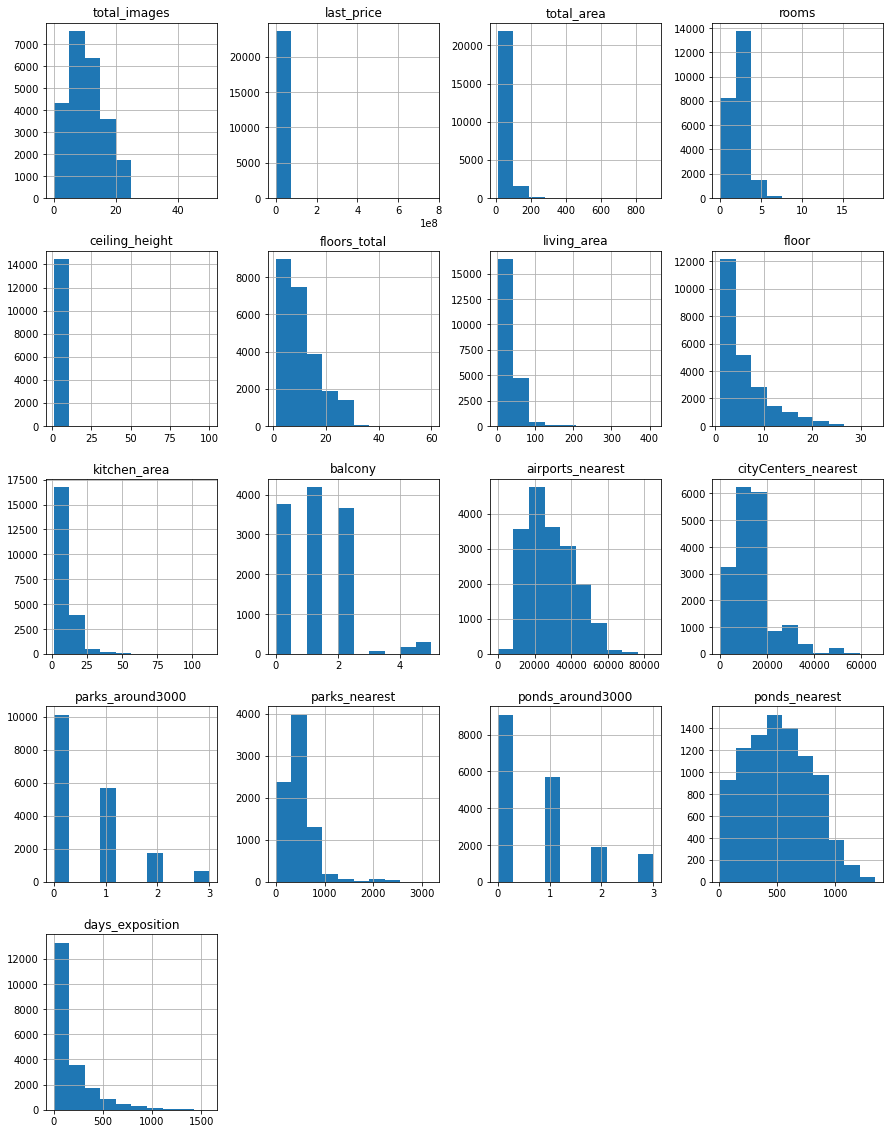

In [6]:
data.hist(figsize=(15, 20));

In [7]:
#посмотрим на данные через список определенных значений
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


#### Подозрительно что в :
* столбце rooms минимальное значение - 0
* столбце ceiling_height минимальное значение 1 метр а максимальное 100 метров 
* столбце floors_total максимальное колличество комнат в квартире - 60 комнат 
* столбце floor макисмальное значение 60 этажей 
* столбце days_exposition макисмальное значение 1580 дней

In [8]:
#посмотрим сколько пропусков в каждом столбце
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,39.000000
floors_total,0.000000
living_area,8.000000
floor,0.000000
is_apartment,88.000000


#### Микро вывод 
Исходя из вышеперечисленного можно сделать вывод, что пропуском в таблице много,анамально много в is_apartment,parks_nearest,ponds_nearest ,balcony , и ceiling_height


### Предобработка данных

#### Попробую предположить  почему есть пропуски в данных и что с этим делать ####

celing_height- значения могли пропустить по нескольким причинам.Например потому что человек не знает какая высота потолков в его квартире или по причине того что он считает что такая информация не важна при продаже.Думаю что пропуски лучше заменить на медианные значения в зависимости от удлаенности от центра

floors_total - пропусков не много, возможно данные посчитали не столь важными и оставили пропуск.Думаю можно оставить все как есть, так как пропусков не много и поиск на что заменить заемет много времени, которое можно потратить на те данные, которые более важны в исследовании.

living_area - важное значение в данных, но как заменить пропуски в не понятно,хотя бы потому что медианой или средним заменять не корректно 

is_apartment - самое максимальное колличество пропускво именно тут,пропуски возможны из-за того что продавец не знает что такое апартаменты или посчитал что это не важная информация.Думаю что пропуски лучше заменить на False, так как все таки некоторые строки заполнены как True.Пропуск может быть из-за того, что люди просто не знают что такое апартаменты.

kitchen_area - важное значение в данных, но проставлять среднее счита не корректным

balcony - много пропусков и думаю что их стоит заменить 0, что будет означать "Нет балкона"

locality_name - название настеленного пункта возможно пропущенно по ошибке продавца и так как пропусков не много их можно заменить на "Санкт-Петербург"

airports_nearest  - важный показатель для исследования, который рассчитывали и вносили картограффически.Такое колличество пропусков может быть из-за того что аэропорт искали в определенном радиусе от данной недвижимости и аэропорта просто там не оказалось.Думаю что медианой ситать такие данные будет не корректно и предлогаю оставитить пропуски 

city_centers_nearest  - данные для этой строки заполнялись картограффически и возможно пропуски означают,что этот объект слишком мал что бы в нем выделялся центр(если конечно центром не считается сам СПб...)

parks_around_3000 - данные вносились картограффически,по этому предлогаю оставить все как есть, так как это не самые важные данные в исследовании 

parks_nearest - данные вносились картограффически,по этому предлогаю оставить все как есть, так как это не самые важные данные в исследовании 

ponds_around3000 - данные вносились картограффически,по этому предлогаю оставить все как есть, так как это не самые важные данные в исследовании 


ponds_nearest - данные вносились картограффически,по этому предлогаю оставить все как есть, так как это не самые важные данные в исследовании 

days_exposition -  предлогаю оставить все как есть,так как мы никак не узнаем сколько дней было выставлено объявление, так как заменить медианой или средним не имеет смысла.Возможн объявление все еще не снято -  забыли снять объявление после продажи, а заменить значения на среднне или медиану будет не корректно.

# ceiling_height

In [10]:
#Напишем функцию которая категооизирует каждую строку по удаленности от центра 
def center_category(data):
    if data['cityCenters_nearest'] < 2500:
        return 'центр'
    if data['cityCenters_nearest'] < 5000:
        return 'близко к центру'
    if data['cityCenters_nearest'] < 15000:
        return 'окраина'
    if data['cityCenters_nearest'] >= 15000:
        return 'область'
    
data['center_category']  = data.apply(center_category,axis = 1)
data[['cityCenters_nearest','center_category','ceiling_height']].head(10)


,cityCenters_nearest,center_category,ceiling_height
0,16028.0,область,2.70
1,18603.0,область,NaN
2,13933.0,окраина,NaN
3,6800.0,окраина,NaN
4,8098.0,окраина,3.03
5,NaN,None,NaN
6,19143.0,область,NaN
7,11634.0,окраина,NaN
8,NaN,None,NaN
9,15008.0,область,2.50


In [11]:
#теперь нужно заполнить столбец ceiling_height медианой в зависимости от того в какой зоне находится квартира
data.groupby('center_category')['ceiling_height'].median().sort_values(ascending=False).to_frame()
#ниже видна зависимость того как меняется высота потолков по отношению к близости к центру

,ceiling_height
center_category,
центр,3.20
близко к центру,3.08
окраина,2.65
область,2.60


In [12]:
for i in data['center_category'].unique():
    data.loc[(data['center_category'] == i) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['center_category'] == i), 'ceiling_height'].median()

In [13]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           2575
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
center_category          5519
dtype: int64

Могу предположить, что все остальные пропуски не заполнились по причине того, что в них нет данных о том на каком расстоянии находится недвижимость от центра города

# is_apartment

In [14]:
#всего пропусков в данных
data['is_apartment'].isnull().sum()

20924

In [15]:
#посмотрим какие есть типы значений в данном столбце и сколько их
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [16]:
data['is_apartment'] = data['is_apartment'].fillna(False)


In [17]:
#посмотрим сколько пропусков осталось 
data['is_apartment'].isnull().sum()

0

# balcony

In [18]:
#заменим Nan на значения 0 в столбце balcony, так как похоже на то что балкона нет в данной квартире 
data['balcony'] = data['balcony'].fillna(0)

In [19]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           2575
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
center_category          5519
dtype: int64

# locality_name 

In [20]:
#заполним оставшиеся строки значением Санкт-Петербург
data['locality_name'] = data['locality_name'].fillna('Санкт-Петербурге')

In [21]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           2575
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
center_category          5519
dtype: int64

# Изменим типы данных

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        21124 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

Надо изменить некоторые типы данных и привести к змеиному регистру:
* last_price - изменено на int так как в данных только целые числа и чтоб было не так громоздко
* total_area - изменено на int так как в данных только целые числа
* balcony- число балкнов может быть только целое
* parks_around3000- число парков может быть только целым
* ponds_around3000- число водоемов может быть только целым
* days_exposition- число дней может быть только целым


In [23]:
data['last_price'] = data['last_price'].astype('int64')
data['total_area'] = data['total_area'].astype('int64')
data['balcony'] = data['balcony'].astype('int64')
data['is_apartment'] = data['is_apartment'].astype('bool')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  int64  
 2   total_area            23699 non-null  int64  
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        21124 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

Могу предположить, что все закомментирванные строки не получилось перевести в нужный тип из-за того что там остались пропуски в виде Nan, а удалять эти строки не стоит по причине ттго что это большой массив данных, а если заменить на 0 то могут исказиться дальнейшие  результаты.

In [25]:
#привидем некоторые строки к нужному виду
data = data.rename(columns = {'cityCenters_nearest':'city_centers_nearest','parks_around3000':'parks_around_3000','ponds_around3000':'ponds_around_3000'})

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  int64  
 2   total_area            23699 non-null  int64  
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        21124 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  int64  
 14  locality_name         23699 non-null  object 
 15  airports_nearest   

In [27]:
#оставим только дату 
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [28]:
#посмотрим на то как изменились 
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,center_category
0,20,13000000,108,2019-03-07,3,2.70,16.0,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,область
1,7,3350000,40,2018-12-04,1,2.60,11.0,18.6,1,False,...,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,область
2,10,5196000,56,2015-08-20,2,2.65,5.0,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,окраина
3,0,64900000,159,2015-07-24,3,2.65,14.0,NaN,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,окраина
4,2,10000000,100,2018-06-19,2,3.03,14.0,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,окраина
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133,2017-03-21,3,3.70,5.0,73.3,3,False,...,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,близко к центру
23695,14,3100000,59,2018-01-15,3,NaN,5.0,38.0,4,False,...,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,None
23696,18,2500000,56,2018-02-11,2,NaN,3.0,29.7,1,False,...,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
23697,13,11475000,76,2017-03-28,2,3.00,17.0,NaN,12,False,...,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,окраина


 # Устранение неявных дубликатов в названиях населённых пунктов

In [29]:
#посмотрим сколько всего значений 
len(data['locality_name'])

23699

In [30]:
#посмотрим сколько всего уникальных значений 
len(data['locality_name'].unique())

365

In [31]:
#список уникальных значений 
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Санкт-Петербурге', 'Светогорск', 'Сертолово', 'Сестрорецк',
       'Сланцы', 'Сосновый Бор', 'Сясьстрой', 'Тихвин', 'Тосно',
       'Шлиссельбург', 'городской поселок Большая Ижора',
       'городской поселок Янино-1', 'городской посёлок Будогощь',
       'городской посёлок Виллози', 'городской посёлок Лесогорский',
       'городской посёлок Мга', 'городской посёлок Назия',
       'городской посёлок Новоселье', 'городской посёлок Павлово',
       'городской посёлок Рощино', 'городской посёлок Свирьстрой',
    

In [32]:
#оставим только названия 
dupl = ['городской поселок','городской посёлок','деревня','поселок','посёлок','посёлок при железнодорожной станции','посёлок станции',\
        'садоводческое некоммерческое товарищество',
        'садовое товарищество','село','городского типа','при железнодорожной станции','станции']
name = ''
data['locality_name'] = data['locality_name'].replace(dupl,name,regex=True)

# Устранение аномалий

In [33]:
data['total_images'].describe()


count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

Есть странное максимальное кол-во фотографий в размерер 50 штук,но могу предположить что ктото выложил объявление о продаже дома с большой площадью или допустим это может быть общежитие

In [34]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

В данном столбце аномалий не видно

In [35]:
data['total_area'].describe()

count    23699.000000
mean        60.120511
std         35.665822
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        900.000000
Name: total_area, dtype: float64

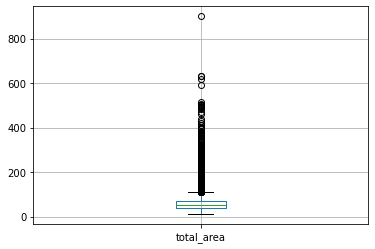

In [36]:
data.boxplot('total_area');
 

In [37]:
data = data.loc[data['total_area'] <= 400]

In [38]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,center_category
0,20,13000000,108,2019-03-07,3,2.70,16.0,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,область
1,7,3350000,40,2018-12-04,1,2.60,11.0,18.6,1,False,...,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,область
2,10,5196000,56,2015-08-20,2,2.65,5.0,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,окраина
3,0,64900000,159,2015-07-24,3,2.65,14.0,NaN,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,окраина
4,2,10000000,100,2018-06-19,2,3.03,14.0,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,окраина
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133,2017-03-21,3,3.70,5.0,73.3,3,False,...,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,близко к центру
23695,14,3100000,59,2018-01-15,3,NaN,5.0,38.0,4,False,...,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,None
23696,18,2500000,56,2018-02-11,2,NaN,3.0,29.7,1,False,...,0,Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
23697,13,11475000,76,2017-03-28,2,3.00,17.0,NaN,12,False,...,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,окраина


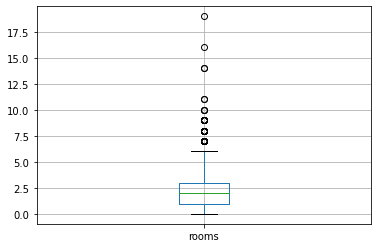

In [39]:
data.boxplot('rooms');

In [40]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,center_category
0,20,13000000,108,2019-03-07,3,2.70,16.0,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,область
1,7,3350000,40,2018-12-04,1,2.60,11.0,18.6,1,False,...,2,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,область
2,10,5196000,56,2015-08-20,2,2.65,5.0,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,окраина
3,0,64900000,159,2015-07-24,3,2.65,14.0,NaN,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,окраина
4,2,10000000,100,2018-06-19,2,3.03,14.0,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,окраина
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133,2017-03-21,3,3.70,5.0,73.3,3,False,...,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN,близко к центру
23695,14,3100000,59,2018-01-15,3,NaN,5.0,38.0,4,False,...,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0,None
23696,18,2500000,56,2018-02-11,2,NaN,3.0,29.7,1,False,...,0,Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
23697,13,11475000,76,2017-03-28,2,3.00,17.0,NaN,12,False,...,2,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0,окраина


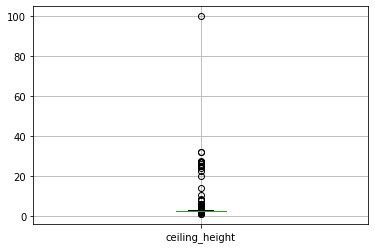

In [41]:
data.boxplot('ceiling_height');

In [42]:
data['ceiling_height'].describe()

count    21101.000000
mean         2.741901
std          1.049382
min          1.000000
25%          2.600000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

In [43]:
def function(row):
    if row > 20:
        return row / 10
row = data['ceiling_height']
data['ceiling_height'] = data['ceiling_height'].apply(function)

/var/folders/kc/f8bzfpwj7fl5_mjbw93r1ds00000gp/T/ipykernel_61852/2248033881.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ceiling_height'] = data['ceiling_height'].apply(function)


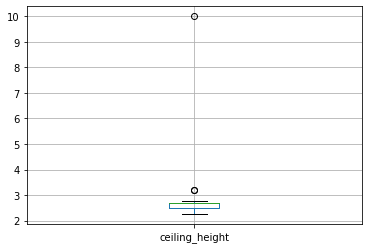

In [44]:
data.boxplot('ceiling_height');

In [45]:
data['floors_total'].describe()

count    23590.000000
mean        10.675625
std          6.597845
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

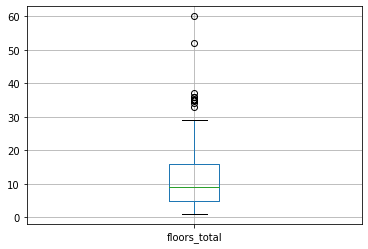

In [46]:
data.boxplot('floors_total');

не похоже что здесь есть аномальные значения, так как дома могут быть и многотажные.

In [47]:
data['living_area'].describe()

count    21779.000000
mean        34.267705
std         20.845024
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        264.500000
Name: living_area, dtype: float64

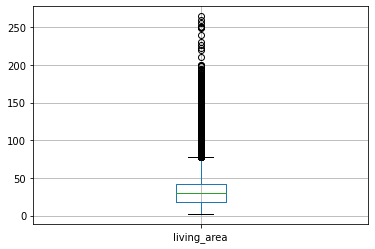

In [48]:
data.boxplot('living_area');

Видно, что много выбросов в районе 55 и выше, но такая площадь может быть.

In [49]:
data['floor'].describe()

count    23676.000000
mean         5.890818
std          4.884364
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

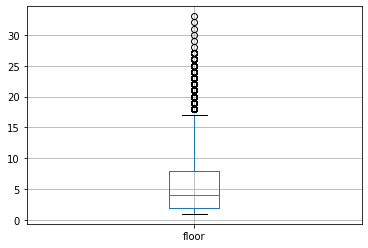

In [50]:
data.boxplot('floor');

In [51]:
data['balcony'].describe()

count    23676.000000
mean         0.591147
std          0.959019
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

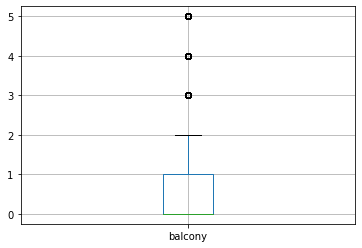

In [52]:
data.boxplot('balcony');

In [53]:
data['airports_nearest'].describe()

count    18137.000000
mean     28793.202790
std      12635.267937
min          0.000000
25%      18576.000000
50%      26726.000000
75%      37277.000000
max      84869.000000
Name: airports_nearest, dtype: float64

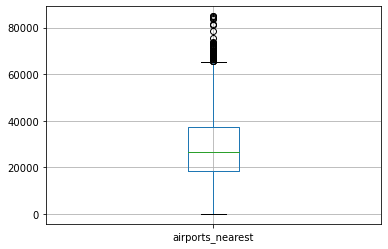

In [54]:
data.boxplot('airports_nearest');

In [55]:
data['city_centers_nearest'].describe()

count    18158.000000
mean     14200.734167
std       8608.160845
min        181.000000
25%       9243.000000
50%      13106.000000
75%      16294.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

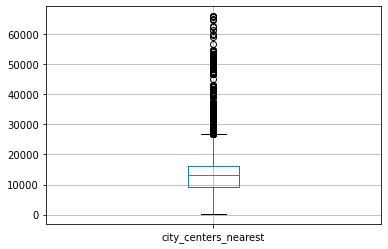

In [56]:
data.boxplot('city_centers_nearest');

Не вижу тут аномальных зачений

In [57]:
data['parks_around_3000'].describe()

count    18159.000000
mean         0.610992
std          0.801751
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around_3000, dtype: float64

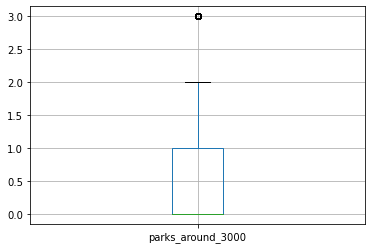

In [58]:
data.boxplot('parks_around_3000');

Не вижу тут аномальных значений.

In [59]:
data['parks_nearest'].describe()

count    8066.000000
mean      490.852963
std       342.423261
min         1.000000
25%       288.000000
50%       454.500000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

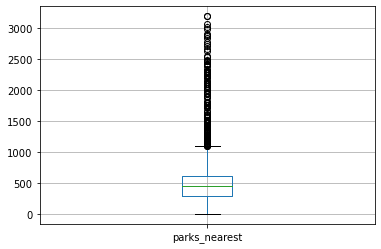

In [60]:
data.boxplot('parks_nearest');

Не вижу тут аномальных значений.Расстояние до ближайшего парка может быть большим)

In [61]:
data['ponds_around_3000'].describe()

count    18159.000000
mean         0.769646
std          0.937860
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around_3000, dtype: float64

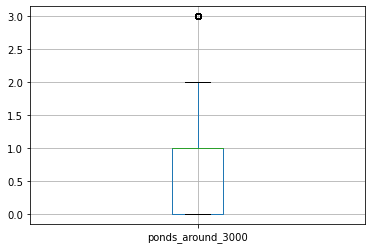

In [62]:
data.boxplot('ponds_around_3000');

Аномалий не видно 

In [63]:
data['ponds_nearest'].describe()

count    9097.000000
mean      518.334726
std       277.696955
min        13.000000
25%       294.000000
50%       503.000000
75%       730.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

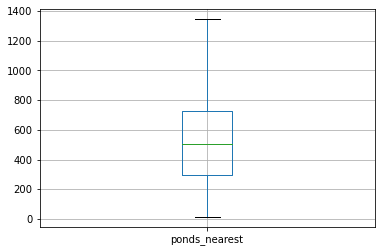

In [64]:
data.boxplot('ponds_nearest');

Аномалий не видно, возможно, что такое не большое расстрояние до ближайшего водоема означает, что водоем находитс на территории частного дома.

In [65]:
data['days_exposition'].describe()

count    20500.000000
mean       180.866732
std        219.701808
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

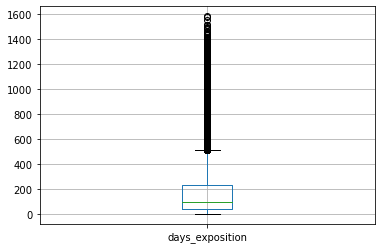

In [66]:
data.boxplot('days_exposition');

к минимальному значению вопросов нет, но максимальное слишком высокое(получается что некоторые квартиры продавались около 4 лет).Думаю что такие показатели могут означать что объявление забылои снять после продажи.Медиана имеет вполне нормальное значение - продажа квартиры примерно за 4 месяца,похоже на правду,как и значение среднего.Думаю что лучше остаить значения равные среднему.

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23676 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23676 non-null  int64         
 1   last_price            23676 non-null  int64         
 2   total_area            23676 non-null  int64         
 3   first_day_exposition  23676 non-null  datetime64[ns]
 4   rooms                 23676 non-null  int64         
 5   ceiling_height        22 non-null     float64       
 6   floors_total          23590 non-null  float64       
 7   living_area           21779 non-null  float64       
 8   floor                 23676 non-null  int64         
 9   is_apartment          23676 non-null  bool          
 10  studio                23676 non-null  bool          
 11  open_plan             23676 non-null  bool          
 12  kitchen_area          21401 non-null  float64       
 13  balcony         

In [68]:
data = data.loc[data['days_exposition'] <= 545]

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19001 entries, 1 to 23695
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          19001 non-null  int64         
 1   last_price            19001 non-null  int64         
 2   total_area            19001 non-null  int64         
 3   first_day_exposition  19001 non-null  datetime64[ns]
 4   rooms                 19001 non-null  int64         
 5   ceiling_height        17 non-null     float64       
 6   floors_total          18928 non-null  float64       
 7   living_area           17381 non-null  float64       
 8   floor                 19001 non-null  int64         
 9   is_apartment          19001 non-null  bool          
 10  studio                19001 non-null  bool          
 11  open_plan             19001 non-null  bool          
 12  kitchen_area          17031 non-null  float64       
 13  balcony         

In [70]:
data.duplicated().sum()

0

Проверка на явные дубликаты показала,что таковых нет.

### Вывод по разделу "Устранение аномалий"

В данных оказалось достаточное кол-во выбросов по разным типам столбцов, но как правило они были логически объяснены. Были аномалии, которые похожи на человеческий фактор,например высоту потолков продавцы часто указывают не в том формате, что нужно.Возможно стоит доработать это при помощи backend специалистов, которые смогут настроить заполнение сайта так,что бы при аномально больших значениях сайти не давал пройти дальше и указывал на ошибку.Так же стоит оьратить внимание на столбец days_exposition, там очень много аномально больших значений, которые указывают на то, что люди забывают закрыть объявление после продажи.Опять же, думаю стоит обратиться за помощью к backend специалистам или специалистам службы колл-центров, которые обзванивали клиентов с аномально большими значениями и спрашивали продали ли они недвижимость или нет, и в случае продажи самостоятельно закрывали объявления.

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19001 entries, 1 to 23695
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          19001 non-null  int64         
 1   last_price            19001 non-null  int64         
 2   total_area            19001 non-null  int64         
 3   first_day_exposition  19001 non-null  datetime64[ns]
 4   rooms                 19001 non-null  int64         
 5   ceiling_height        17 non-null     float64       
 6   floors_total          18928 non-null  float64       
 7   living_area           17381 non-null  float64       
 8   floor                 19001 non-null  int64         
 9   is_apartment          19001 non-null  bool          
 10  studio                19001 non-null  bool          
 11  open_plan             19001 non-null  bool          
 12  kitchen_area          17031 non-null  float64       
 13  balcony         

### Посчитайте и добавьте в таблицу новые столбцы

In [72]:
data['price_meter'] = data['last_price']/data['total_area']

/var/folders/kc/f8bzfpwj7fl5_mjbw93r1ds00000gp/T/ipykernel_61852/519851185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price_meter'] = data['last_price']/data['total_area']


In [73]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,center_category,price_meter
1,7,3350000,40,2018-12-04,1,NaN,11.0,18.6,1,False,...,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,область,83750.000000
3,0,64900000,159,2015-07-24,3,NaN,14.0,NaN,9,False,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,окраина,408176.100629
4,2,10000000,100,2018-06-19,2,NaN,14.0,32.0,13,False,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,окраина,100000.000000
5,10,2890000,30,2018-09-10,1,NaN,12.0,14.4,5,False,...,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,None,96333.333333
6,6,3700000,37,2017-11-02,1,NaN,26.0,10.6,6,False,...,Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,область,100000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23690,3,5500000,52,2018-07-19,2,NaN,5.0,31.0,2,False,...,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0,окраина,105769.230769
23691,11,9470000,72,2016-10-13,2,NaN,25.0,40.3,7,False,...,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0,близко к центру,131527.777778
23692,2,1350000,30,2017-07-07,1,NaN,5.0,17.5,4,False,...,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0,None,45000.000000
23693,9,4600000,62,2016-08-05,3,NaN,9.0,40.0,8,False,...,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0,область,74193.548387


In [74]:
#приведем в целочисленный вид
data['price_meter'] = data['price_meter'].astype('int64')

/var/folders/kc/f8bzfpwj7fl5_mjbw93r1ds00000gp/T/ipykernel_61852/1958901953.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price_meter'] = data['price_meter'].astype('int64')


In [75]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,center_category,price_meter
1,7,3350000,40,2018-12-04,1,NaN,11.0,18.6,1,False,...,Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,область,83750
3,0,64900000,159,2015-07-24,3,NaN,14.0,NaN,9,False,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,окраина,408176
4,2,10000000,100,2018-06-19,2,NaN,14.0,32.0,13,False,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,окраина,100000
5,10,2890000,30,2018-09-10,1,NaN,12.0,14.4,5,False,...,Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,None,96333
6,6,3700000,37,2017-11-02,1,NaN,26.0,10.6,6,False,...,Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,область,100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23690,3,5500000,52,2018-07-19,2,NaN,5.0,31.0,2,False,...,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0,окраина,105769
23691,11,9470000,72,2016-10-13,2,NaN,25.0,40.3,7,False,...,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0,близко к центру,131527
23692,2,1350000,30,2017-07-07,1,NaN,5.0,17.5,4,False,...,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0,None,45000
23693,9,4600000,62,2016-08-05,3,NaN,9.0,40.0,8,False,...,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0,область,74193


In [76]:
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year
data['day'] = pd.DatetimeIndex(data['first_day_exposition']).weekday


/var/folders/kc/f8bzfpwj7fl5_mjbw93r1ds00000gp/T/ipykernel_61852/3653862086.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
/var/folders/kc/f8bzfpwj7fl5_mjbw93r1ds00000gp/T/ipykernel_61852/3653862086.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year
/var/folders/kc/f8bzfpwj7fl5_mjbw93r1ds00000gp/T/ipykernel_61852/3653862086.py:3: SettingWithCopyWarning: 
A value is tr

In [77]:
data['ceiling_height'].unique()

array([  nan,  2.5 ,  2.7 ,  2.4 ,  2.6 ,  2.26,  2.75, 10.  ])

In [78]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,center_category,price_meter,month,year,day
1,7,3350000,40,2018-12-04,1,NaN,11.0,18.6,1,False,...,0.0,NaN,0.0,NaN,81.0,область,83750,12,2018,1
3,0,64900000,159,2015-07-24,3,NaN,14.0,NaN,9,False,...,2.0,84.0,3.0,234.0,424.0,окраина,408176,7,2015,4
4,2,10000000,100,2018-06-19,2,NaN,14.0,32.0,13,False,...,2.0,112.0,1.0,48.0,121.0,окраина,100000,6,2018,1
5,10,2890000,30,2018-09-10,1,NaN,12.0,14.4,5,False,...,NaN,NaN,NaN,NaN,55.0,None,96333,9,2018,0
6,6,3700000,37,2017-11-02,1,NaN,26.0,10.6,6,False,...,0.0,NaN,0.0,NaN,155.0,область,100000,11,2017,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23690,3,5500000,52,2018-07-19,2,NaN,5.0,31.0,2,False,...,1.0,300.0,0.0,NaN,15.0,окраина,105769,7,2018,3
23691,11,9470000,72,2016-10-13,2,NaN,25.0,40.3,7,False,...,0.0,NaN,1.0,806.0,519.0,близко к центру,131527,10,2016,3
23692,2,1350000,30,2017-07-07,1,NaN,5.0,17.5,4,False,...,NaN,NaN,NaN,NaN,413.0,None,45000,7,2017,4
23693,9,4600000,62,2016-08-05,3,NaN,9.0,40.0,8,False,...,1.0,352.0,1.0,675.0,239.0,область,74193,8,2016,4


In [79]:
#добавим значение с типом этажа
def type(row):
    x = row['floor']
    y = row['floors_total']
    if x == 1:
        return 'первый'
    if x == y:
        return 'последний'
    else:
        return 'другой'
data['floors_type'] = data.apply(type,axis =1)

/var/folders/kc/f8bzfpwj7fl5_mjbw93r1ds00000gp/T/ipykernel_61852/1624902084.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['floors_type'] = data.apply(type,axis =1)


In [80]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,center_category,price_meter,month,year,day,floors_type
1,7,3350000,40,2018-12-04,1,NaN,11.0,18.6,1,False,...,NaN,0.0,NaN,81.0,область,83750,12,2018,1,первый
3,0,64900000,159,2015-07-24,3,NaN,14.0,NaN,9,False,...,84.0,3.0,234.0,424.0,окраина,408176,7,2015,4,другой
4,2,10000000,100,2018-06-19,2,NaN,14.0,32.0,13,False,...,112.0,1.0,48.0,121.0,окраина,100000,6,2018,1,другой
5,10,2890000,30,2018-09-10,1,NaN,12.0,14.4,5,False,...,NaN,NaN,NaN,55.0,None,96333,9,2018,0,другой
6,6,3700000,37,2017-11-02,1,NaN,26.0,10.6,6,False,...,NaN,0.0,NaN,155.0,область,100000,11,2017,3,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23690,3,5500000,52,2018-07-19,2,NaN,5.0,31.0,2,False,...,300.0,0.0,NaN,15.0,окраина,105769,7,2018,3,другой
23691,11,9470000,72,2016-10-13,2,NaN,25.0,40.3,7,False,...,NaN,1.0,806.0,519.0,близко к центру,131527,10,2016,3,другой
23692,2,1350000,30,2017-07-07,1,NaN,5.0,17.5,4,False,...,NaN,NaN,NaN,413.0,None,45000,7,2017,4,другой
23693,9,4600000,62,2016-08-05,3,NaN,9.0,40.0,8,False,...,352.0,1.0,675.0,239.0,область,74193,8,2016,4,другой


#### Расстояние в км до центра города

In [81]:
data['distance_km'] = round(data['city_centers_nearest'] / 1000)

/var/folders/kc/f8bzfpwj7fl5_mjbw93r1ds00000gp/T/ipykernel_61852/1182001935.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['distance_km'] = round(data['city_centers_nearest'] / 1000)


In [82]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around_3000,ponds_nearest,days_exposition,center_category,price_meter,month,year,day,floors_type,distance_km
1,7,3350000,40,2018-12-04,1,NaN,11.0,18.6,1,False,...,0.0,NaN,81.0,область,83750,12,2018,1,первый,19.0
3,0,64900000,159,2015-07-24,3,NaN,14.0,NaN,9,False,...,3.0,234.0,424.0,окраина,408176,7,2015,4,другой,7.0
4,2,10000000,100,2018-06-19,2,NaN,14.0,32.0,13,False,...,1.0,48.0,121.0,окраина,100000,6,2018,1,другой,8.0
5,10,2890000,30,2018-09-10,1,NaN,12.0,14.4,5,False,...,NaN,NaN,55.0,None,96333,9,2018,0,другой,NaN
6,6,3700000,37,2017-11-02,1,NaN,26.0,10.6,6,False,...,0.0,NaN,155.0,область,100000,11,2017,3,другой,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23690,3,5500000,52,2018-07-19,2,NaN,5.0,31.0,2,False,...,0.0,NaN,15.0,окраина,105769,7,2018,3,другой,6.0
23691,11,9470000,72,2016-10-13,2,NaN,25.0,40.3,7,False,...,1.0,806.0,519.0,близко к центру,131527,10,2016,3,другой,4.0
23692,2,1350000,30,2017-07-07,1,NaN,5.0,17.5,4,False,...,NaN,NaN,413.0,None,45000,7,2017,4,другой,NaN
23693,9,4600000,62,2016-08-05,3,NaN,9.0,40.0,8,False,...,1.0,675.0,239.0,область,74193,8,2016,4,другой,34.0


### Проведите исследовательский анализ данных

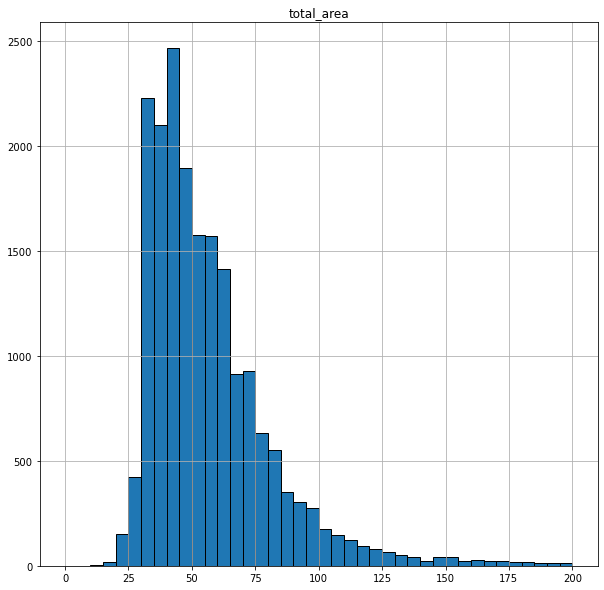

In [83]:
#гистограмма общая площадь
data.hist('total_area',bins=40,range=(0,200),figsize = (10,10),ec='black');

In [84]:
data['total_area'].describe()

count    19001.000000
mean        57.323509
std         30.022623
min         12.000000
25%         39.000000
50%         50.000000
75%         66.000000
max        400.000000
Name: total_area, dtype: float64

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

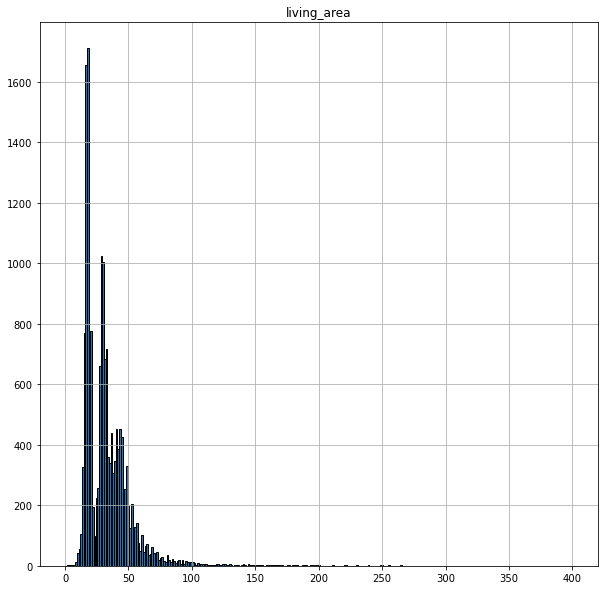

In [85]:
#гистограмма жилая площадь
data.hist('living_area',bins=300,range=(0,400
                                       ),figsize = (10,10),ec='black')

In [86]:
data['living_area'].describe()

count    17381.000000
mean        32.785243
std         19.345694
min          2.000000
25%         18.150000
50%         29.700000
75%         41.000000
max        264.500000
Name: living_area, dtype: float64

График говорит о том что большая часть жилой площади приходится примерно на 25 - 30 кв.м.После 200 значений практически нет.

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

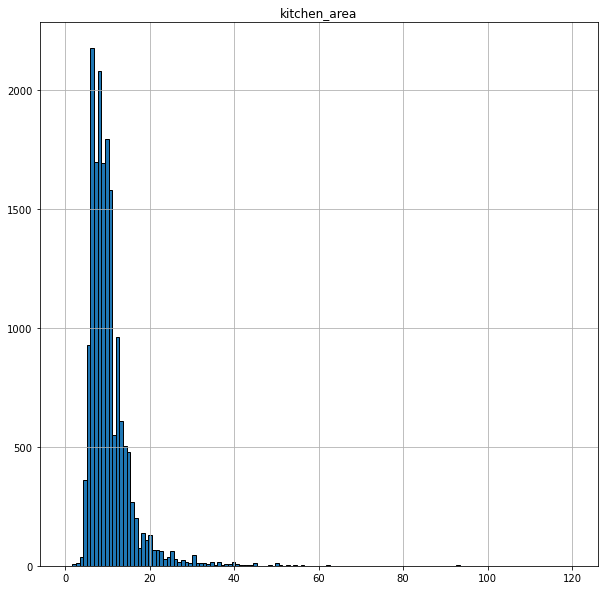

In [87]:
#гистограмма по площадям кухни
data.hist('kitchen_area',bins= 140,range=(0,120),figsize = (10,10),ec='black')

In [88]:
data['kitchen_area'].describe()

count    17031.000000
mean        10.297492
std          5.373259
min          2.000000
25%          7.000000
50%          9.000000
75%         11.700000
max        107.000000
Name: kitchen_area, dtype: float64

Максимальное значение приходится примерно на 9 - 10, чему соответствуют медиана и среднее.Чем больше площадь,тем меньше предложений.

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

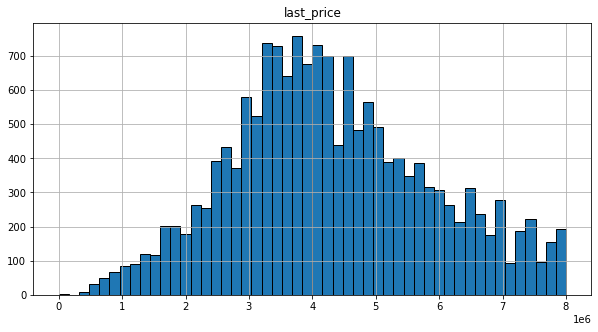

In [89]:
#изучим данные о ценах
data.hist('last_price',bins= 50,range=(0,8000000),figsize = (10,5),ec='black')

In [90]:
data['last_price'].describe()

count    1.900100e+04
mean     5.984473e+06
std      9.195977e+06
min      1.219000e+04
25%      3.390000e+06
50%      4.500000e+06
75%      6.400000e+06
max      7.630000e+08
Name: last_price, dtype: float64

В данных явно есть аномалии.Слишком большой разброс между средним и медианой,так же в начале графика видны странные значения около 0.Возможно это продаются не жилые строения, например гаражи или сараи.

<AxesSubplot:>

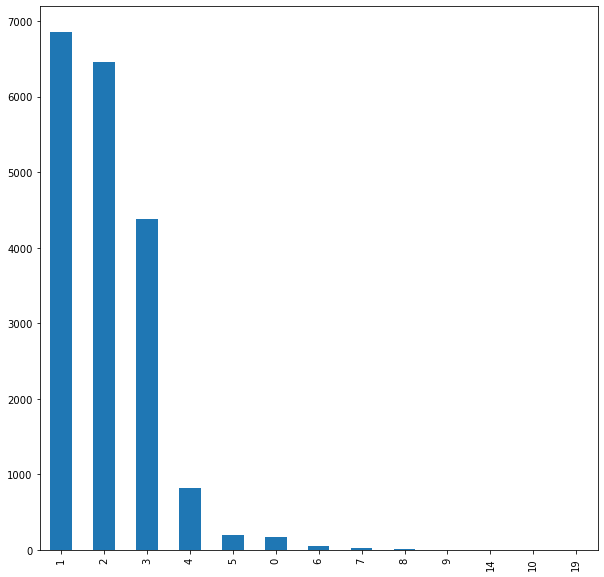

In [91]:
#Изучим показатели по кол-ву комнат
data['rooms'].value_counts().plot.bar(figsize = (10,10))

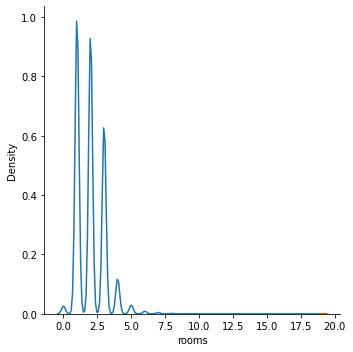

In [92]:
seaborn.displot(x="rooms",
            kind="kde",
            data=data);

In [93]:
data['rooms'].describe()

count    19001.000000
mean         1.996158
std          1.022297
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Наглядно видно, что большая часть квартир являются двухкомнатными.

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

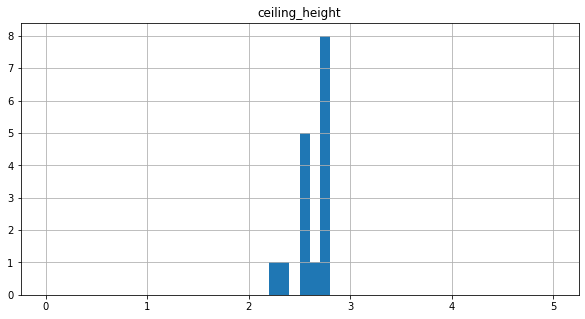

In [94]:
#изучим высоту потолков
data.hist('ceiling_height',bins= 50,range=(0,5),figsize = (10,5))

На данном графике не очень хорошо понятно какая высота потолков самая популярная.Думаю стоит поискать что-то понаглядней.

<AxesSubplot:ylabel='Density'>

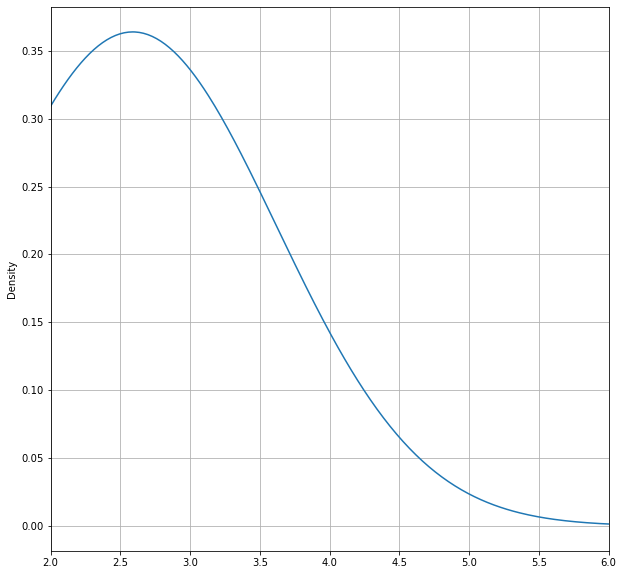

In [95]:
data['ceiling_height'].plot(kind = 'kde', figsize = (10,10) , xlim = (2,6),grid = True)


In [96]:
data['ceiling_height'].describe()

count    17.000000
mean      3.024118
std       1.802779
min       2.260000
25%       2.500000
50%       2.700000
75%       2.700000
max      10.000000
Name: ceiling_height, dtype: float64

Среднее значение 2.7 и медиана 2.65 - графики это подтвердили(особенно последний)

array([[<AxesSubplot:title={'center':'floor'}>]], dtype=object)

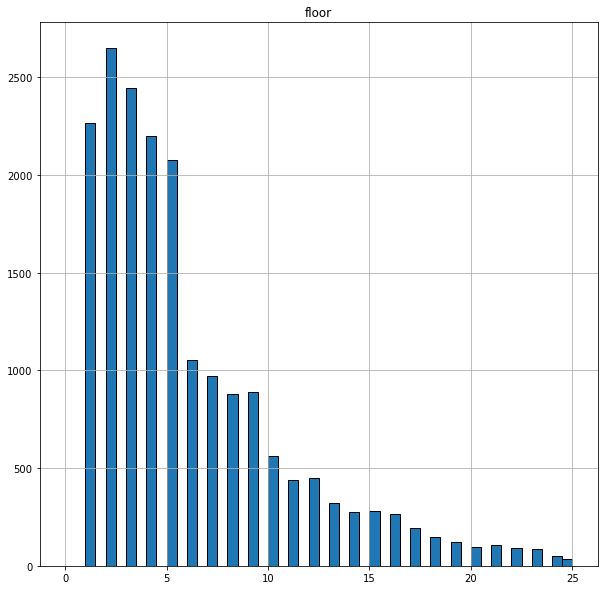

In [97]:
#изучим этажи
data.hist('floor',bins= 50,range=(0,25),figsize = (10,10),ec='black')

In [98]:
data['floor'].describe()

count    19001.00000
mean         6.01442
std          4.95709
min          1.00000
25%          2.00000
50%          4.00000
75%          8.00000
max         33.00000
Name: floor, dtype: float64

Чаще всего квартиры бывают на 2,3 и 4 этажах.

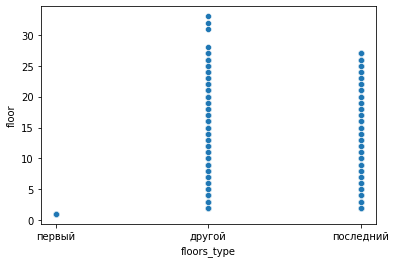

In [99]:
#изучим тип этажа квартиры («первый», «последний», «другой»)
seaborn.scatterplot(data = data, x = 'floors_type',y = 'floor');

График говорит нам о том, что больше всего значений в категории послений, но разница между последним этажом и другим - не велика.

<AxesSubplot:>

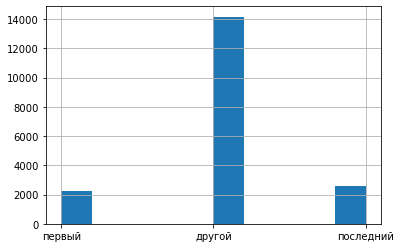

In [100]:
data['floors_type'].hist()

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

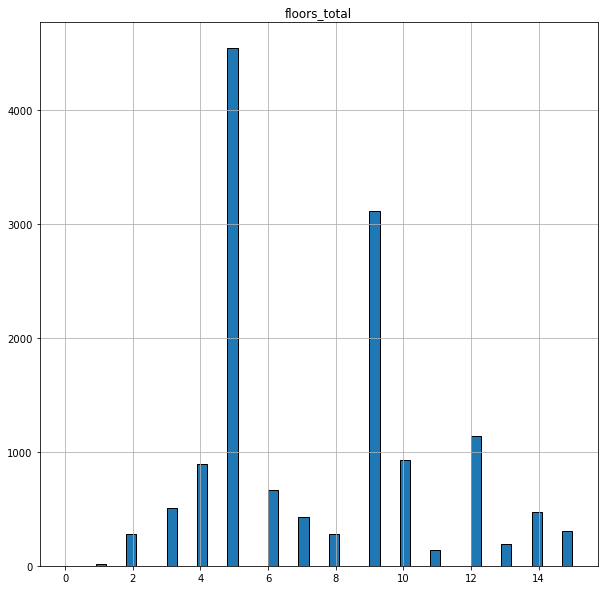

In [101]:
#изучим общее кол-во этажей
data.hist('floors_total',bins= 50,range=(0,15),figsize = (10,10),ec='black')

Из графика видно, что больше всего 5 и 9 этажных домов.

array([[<AxesSubplot:title={'center':'city_centers_nearest'}>]],
      dtype=object)

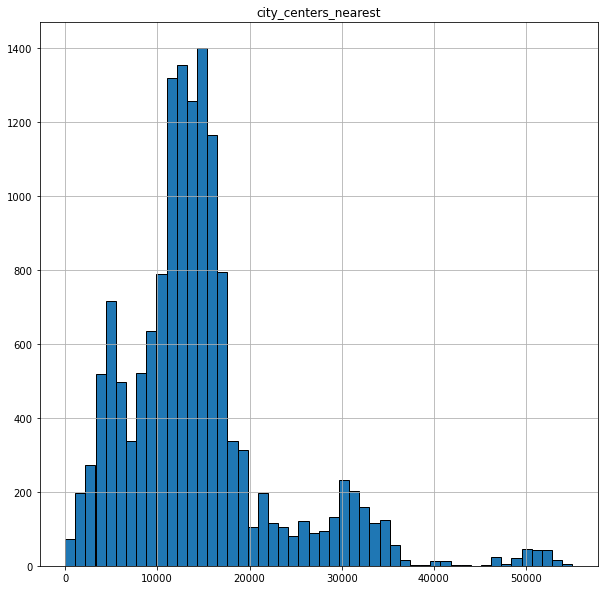

In [102]:
 data.hist('city_centers_nearest',bins= 50,range=(0,55000),figsize = (10,10),ec='black')    

In [103]:
data['city_centers_nearest'].describe()

count    14661.000000
mean     14441.678057
std       8465.925095
min        208.000000
25%       9781.000000
50%      13266.000000
75%      16453.000000
max      64857.000000
Name: city_centers_nearest, dtype: float64

По данному графику видно, что больше большая часть значений находится примерно в  промежутке между 11000 и 12000

array([[<AxesSubplot:title={'center':'airports_nearest'}>]], dtype=object)

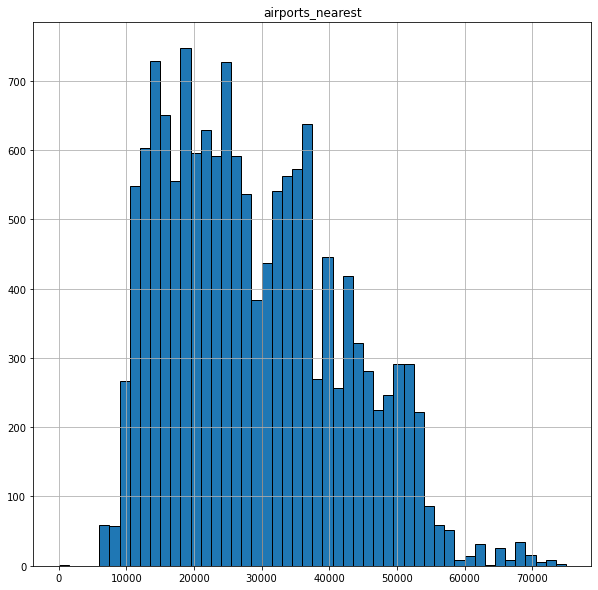

In [104]:
#изучим  расстояние до ближайшего аэропорта в метрах
data.hist('airports_nearest',bins= 50,range=(0,75000),figsize = (10,10),ec='black')    

In [105]:
data['airports_nearest'].describe()

count    14643.000000
mean     28912.273714
std      12801.902585
min          0.000000
25%      18430.500000
50%      26941.000000
75%      37434.000000
max      83758.000000
Name: airports_nearest, dtype: float64

array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

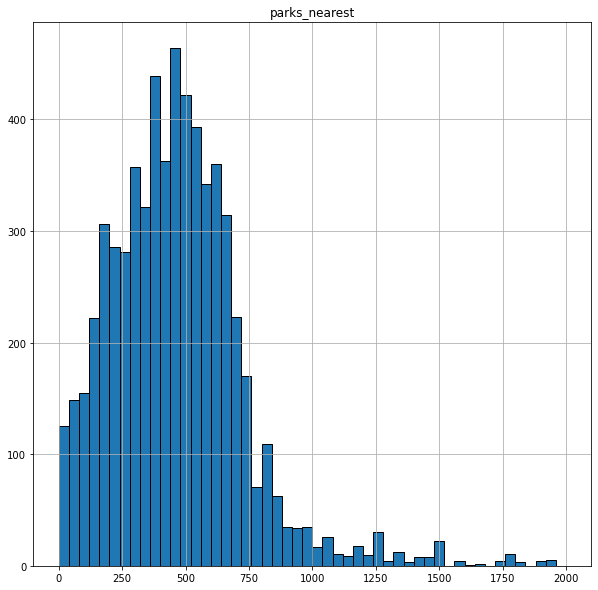

In [106]:
data.hist('parks_nearest',bins= 50,range=(0,2000),figsize = (10,10),ec='black')    

In [107]:
data['parks_nearest'].describe()

count    6338.000000
mean      489.903913
std       341.433050
min         1.000000
25%       287.000000
50%       452.500000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Жилья рядом с парками в пределах 500 метров больше всего,это достаточно близко.Думаю на данные могли так повлиять объявления с продаже недвижимости в области,где лесов достаточно много.

array([[<AxesSubplot:title={'center':'month'}>]], dtype=object)

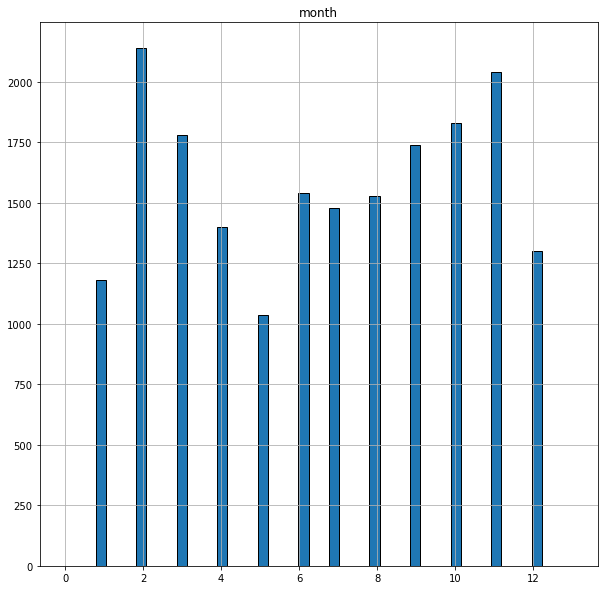

In [108]:
data.hist('month',bins= 50,range=(0,13),figsize = (10,10),ec='black')    

Чаще всего выставляют объявления о продаже недвижимости в ноябре и в февраде, а реже всего в январе. 

array([[<AxesSubplot:title={'center':'day'}>]], dtype=object)

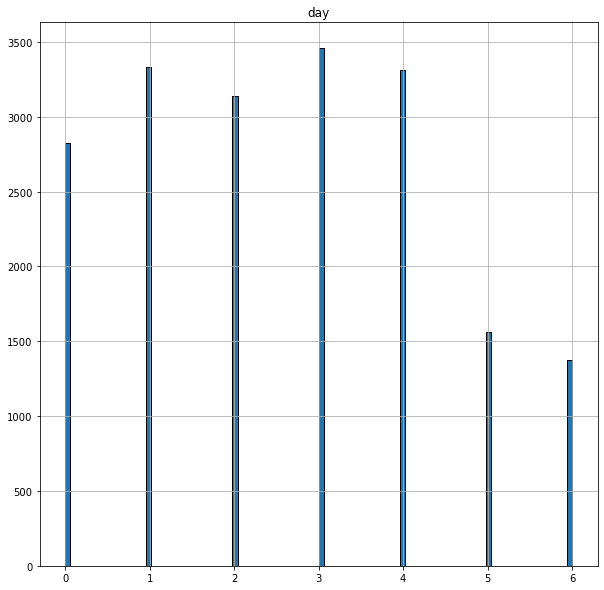

In [109]:
data.hist('day',bins= 100,range=(0,6),figsize = (10,10),ec='black') 

Чаще всего выставляют на продажу недвижимость в вторник и четверг, а реже всего в субботу.

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

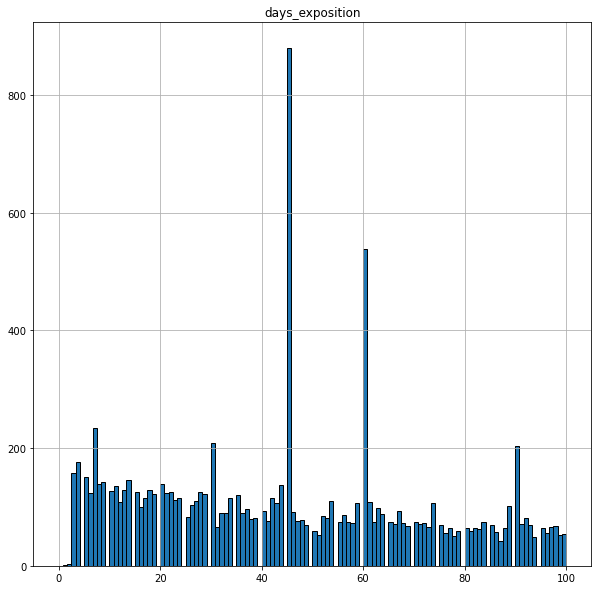

In [110]:
#Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
data.hist('days_exposition',bins= 120,range=(0,100),figsize = (10,10),ec='black')

array([[<AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

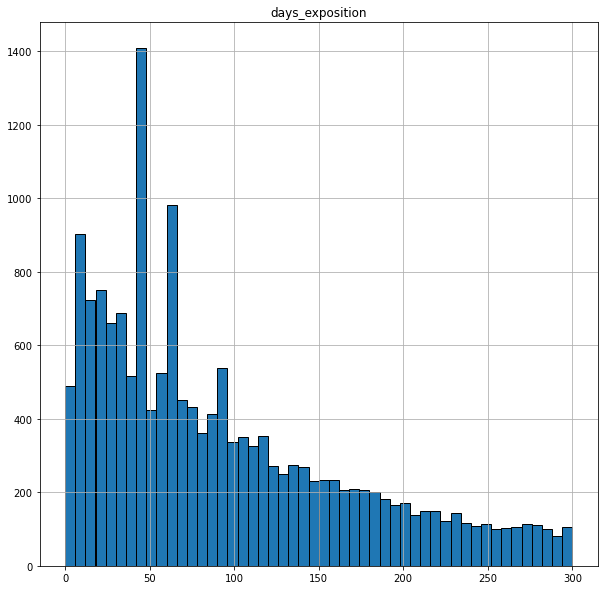

In [111]:
data.hist('days_exposition',bins= 50,range=(0,300),figsize = (10,10),ec='black')

In [112]:
data['days_exposition'].describe()

count    19001.000000
mean       132.291511
std        126.687817
min          1.000000
25%         42.000000
50%         86.000000
75%        187.000000
max        545.000000
Name: days_exposition, dtype: float64

Медиана равна 61 и среднее значение равно 73.Получается что в среднем продажа чуть больше двух месяцев - похоже на правду.
Быстрыми продажами можно считать все значения ниже 61, а долгими все что больше.

0.5887370984323963


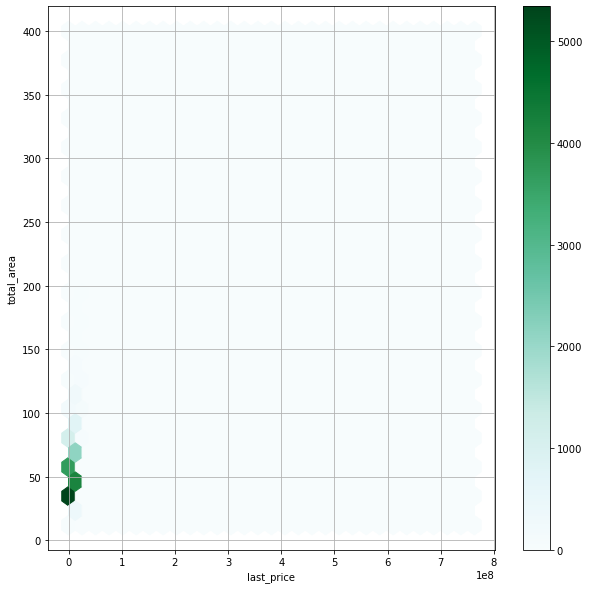

In [113]:
#зависисмость цены от общей площади
data.plot(x='last_price', y='total_area', kind='hexbin', gridsize=30, figsize=(10, 10), sharex=False, grid=True)

print(data['last_price'].corr(data['total_area']))

Коэффициент Пирсона 0.5134579167193402, это доказывает то, что взаимосвязь достаточно сильная.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__

Верная интерпретация значений корреляции Пирсона. Ты молодец =)
</div>

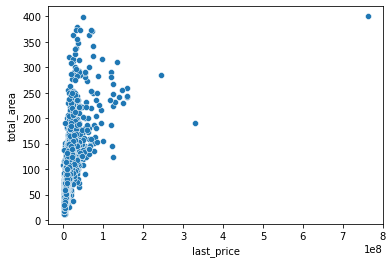

In [114]:
seaborn.scatterplot(data = data,x='last_price',y='total_area');

0.5188932944693327


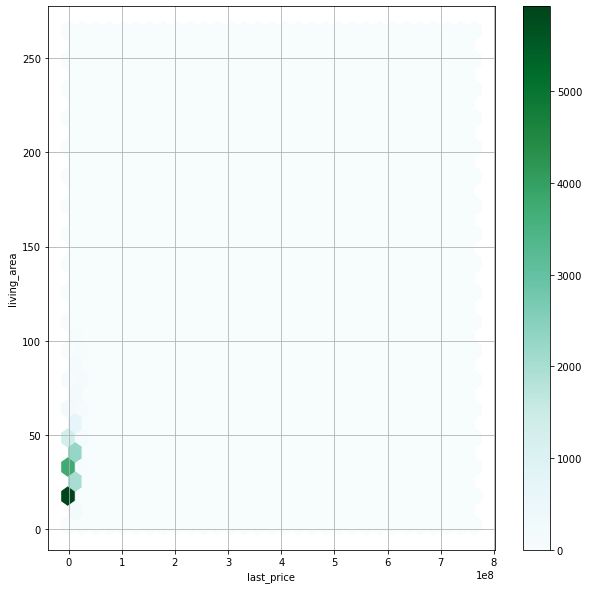

In [115]:
#зависимость цены от размера жилой площади
data.plot(x='last_price', y='living_area', kind='hexbin', gridsize=30, figsize=(10, 10), sharex=False, grid=True)

print(data['last_price'].corr(data['living_area']))

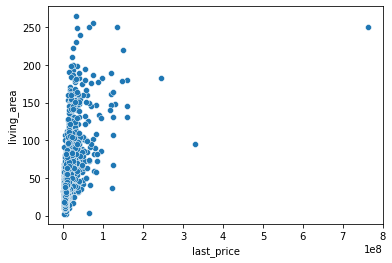

In [116]:
seaborn.scatterplot(data = data,x='last_price',y='living_area');

Коэффициент Пирсона 0.4726232132882983, это доказывает то, что взаимосвязь есть - размер жилой площади не мнго влияет на цену.



0.5092667803001687


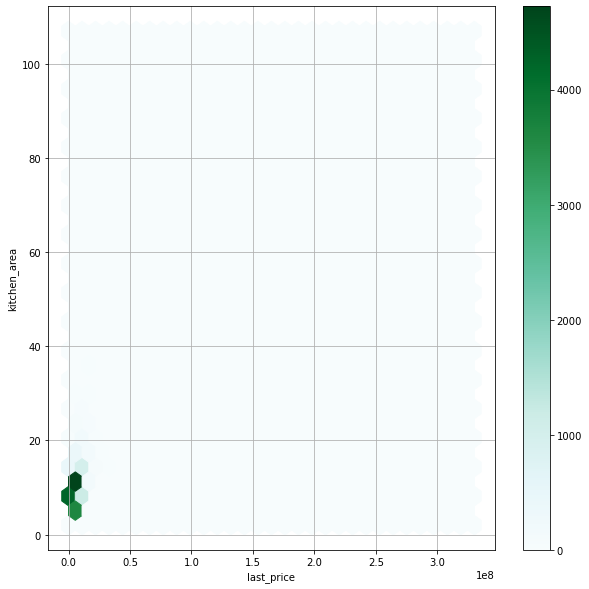

In [117]:
#посмотрим зависимость цены от размера кухни
data.plot(x='last_price', y='kitchen_area', kind='hexbin', gridsize=30, figsize=(10, 10), sharex=False, grid=True)
print(data['last_price'].corr(data['kitchen_area']))

Коэффициент Пирсона 0.580088248204146, это доказывает то, что взаимосвязь есть - размер кухни ощутимо влияет на цену.Смотрим что будет дальше.


0.3397541926487907


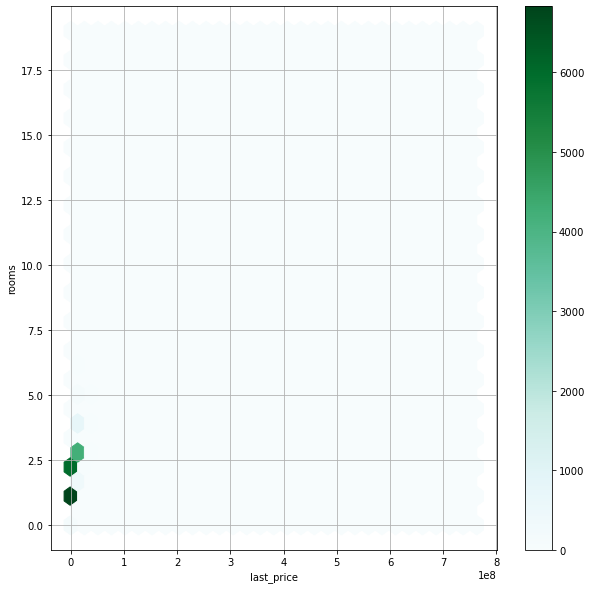

In [118]:
#посмотрим зависимость цены от количества комант
data.plot(x='last_price', y='rooms', kind='hexbin', gridsize=30, figsize=(10, 10), sharex=False, grid=True)
print(data['last_price'].corr(data['rooms']))

Коэффициент Пирсона 0.3241204283906164 , это доказывает то, что взаимосвязи практически нет - количество комнат не сильно влияет на цену.

<AxesSubplot:xlabel='floors_type'>

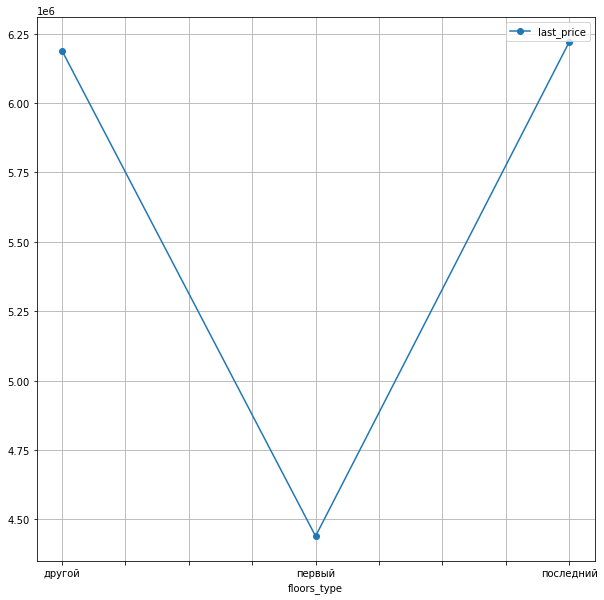

In [119]:
#посмотрим зависимость цены от типа этажа
data.pivot_table(index='floors_type', values='last_price').plot(grid=True, style='o-',figsize=(10, 10))

Наименьшеая стоимость квартиры на первом этаже, а наибольшая стоимость на последнем.

0.0006832072772242552


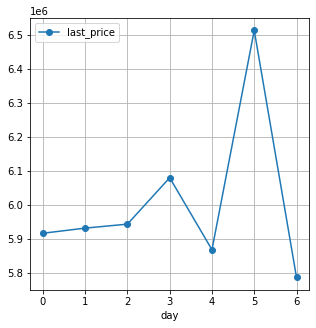

In [120]:
#посмотрим зависимость цены от дня недели
data.pivot_table(index='day', values='last_price').plot(grid=True, style='o-',figsize=(5, 5))
print(data['price_meter'].corr(data['day']))

Зависимость не большая,но можно узнать какие дни макисмально влияют на цену.Минимальная стоимость в вторник, а самоя большая в субботу

<AxesSubplot:xlabel='month'>

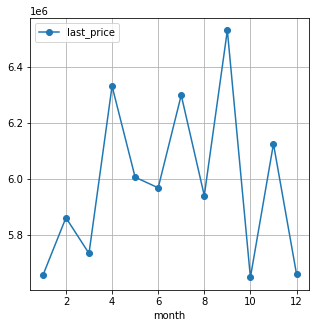

In [121]:
#посмотрим зависимость цены от месяца
data.pivot_table(index='month', values='last_price').plot(grid=True, style='o-',figsize=(5, 5))

Самая большая стоимость в сентябре,а самая маленькая в марте.

<AxesSubplot:xlabel='year'>

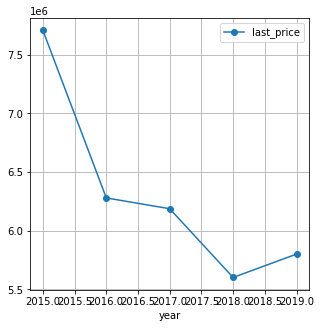

In [122]:
#посмотрим зависимость цены от года
data.pivot_table(index='year', values='last_price').plot(grid=True, style='o-',figsize=(5, 5))

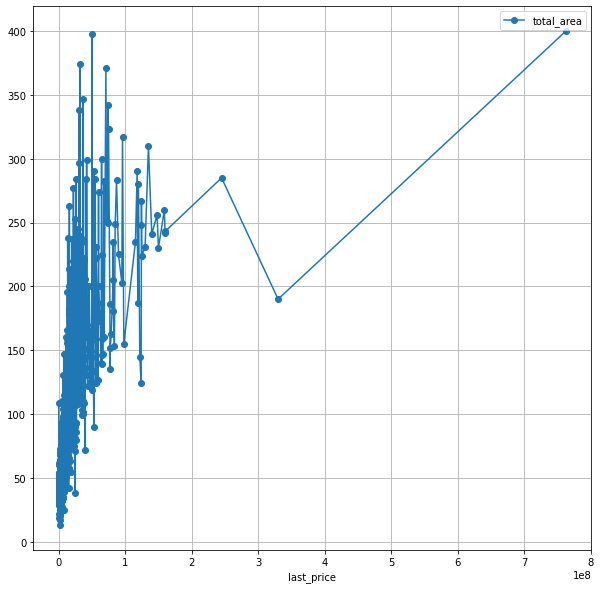

In [123]:
data.pivot_table(index='last_price', values='total_area').plot(grid=True, style='o-',figsize=(10, 10));

<AxesSubplot:xlabel='year'>

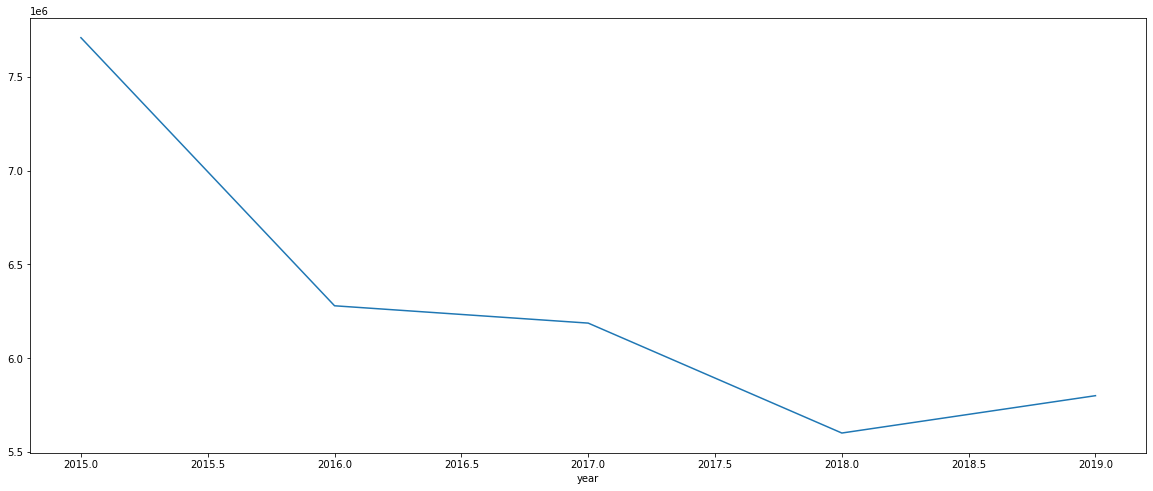

In [124]:
data.groupby('year')['last_price'].mean().plot(figsize = (20, 8))

<div class="alert alert-info"> <b>Комментарии студента:Получается что цена падала до 2018 года. </div>

<AxesSubplot:xlabel='year'>

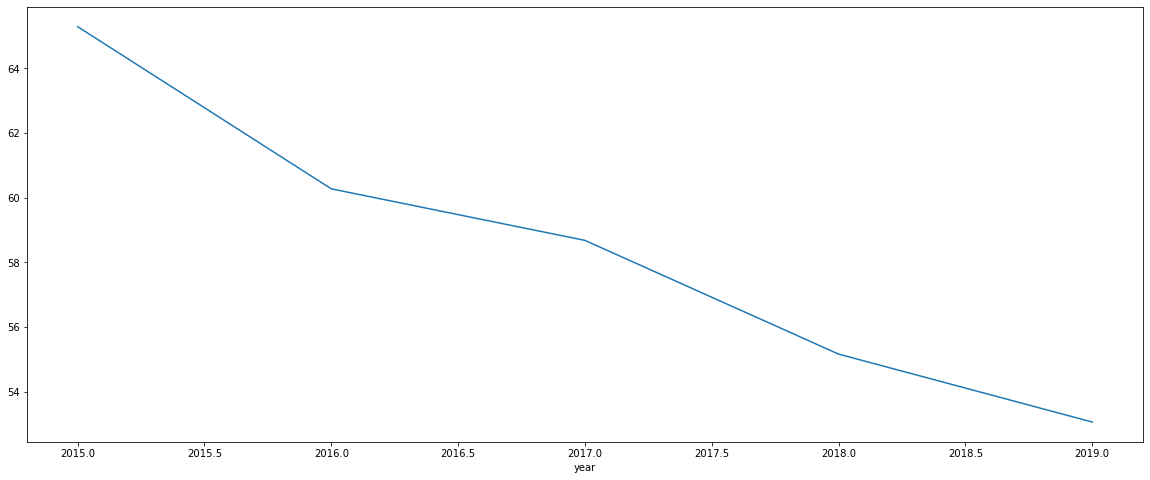

In [125]:
data.groupby('year')['total_area'].mean().plot(figsize = (20, 8))

In [126]:

med = data.pivot_table(index='locality_name', values='price_meter', aggfunc=['count', 'mean'])
med.columns = ['count', 'mean']
med = med.sort_values('count', ascending=False).head(10)
med

,count,mean
locality_name,,
Санкт-Петербург,12573,112083.530740
Мурино,524,86534.290076
Шушары,391,78362.746803
Всеволожск,309,68957.436893
Колпино,295,75090.786441
Парголово,290,89685.368966
Пушкин,281,102188.195730
Кудрово,272,93129.738971
Гатчина,247,68394.287449


In [127]:
data.groupby('locality_name').agg({'balcony':'count', 'last_price':'median'}) \
    .sort_values(by = 'balcony', ascending = False) \
    .head(10)

,balcony,last_price
locality_name,,
Санкт-Петербург,12573,5249000.0
Мурино,524,3369000.0
Шушары,391,3930000.0
Всеволожск,309,3380000.0
Колпино,295,3600000.0
Парголово,290,4050000.0
Пушкин,281,4990000.0
Кудрово,272,3800000.0
Гатчина,247,3030000.0


In [128]:
med['mean'].max()

112083.53074047562

In [129]:
med['mean'].min()

57134.90155440415

Минимальное значение в Колпино	
МАксимальное в Санкт-Петербурге

In [130]:
med = data.pivot_table(index='locality_name', values='price_meter', aggfunc=['count', 'mean'])
med.columns = ['count', 'mean']
med = med.sort_values('count', ascending=False).head(10)
med

,count,mean
locality_name,,
Санкт-Петербург,12573,112083.530740
Мурино,524,86534.290076
Шушары,391,78362.746803
Всеволожск,309,68957.436893
Колпино,295,75090.786441
Парголово,290,89685.368966
Пушкин,281,102188.195730
Кудрово,272,93129.738971
Гатчина,247,68394.287449


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19001 entries, 1 to 23695
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          19001 non-null  int64         
 1   last_price            19001 non-null  int64         
 2   total_area            19001 non-null  int64         
 3   first_day_exposition  19001 non-null  datetime64[ns]
 4   rooms                 19001 non-null  int64         
 5   ceiling_height        17 non-null     float64       
 6   floors_total          18928 non-null  float64       
 7   living_area           17381 non-null  float64       
 8   floor                 19001 non-null  int64         
 9   is_apartment          19001 non-null  bool          
 10  studio                19001 non-null  bool          
 11  open_plan             19001 non-null  bool          
 12  kitchen_area          17031 non-null  float64       
 13  balcony         

In [132]:
spb = data.query('locality_name == "Санкт-Петербург"')
spb = spb.pivot_table(index ='distance_km',values = 'price_meter',aggfunc = 'mean')

spb

,price_meter
distance_km,
0.0,199801.125000
1.0,165331.045113
2.0,155320.680180
3.0,115923.827869
4.0,133366.212371
5.0,136802.142640
6.0,147342.438445
7.0,147724.151703
8.0,123157.223176


In [133]:
#distance_km()
spb = data.query('locality_name == "Санкт-Петербург"').pivot_table(index='distance_km',values = 'price_meter',aggfunc = 'mean')
spb

,price_meter
distance_km,
0.0,199801.125000
1.0,165331.045113
2.0,155320.680180
3.0,115923.827869
4.0,133366.212371
5.0,136802.142640
6.0,147342.438445
7.0,147724.151703
8.0,123157.223176


<AxesSubplot:title={'center':'Стоимость 1 км'}, xlabel='distance_km'>

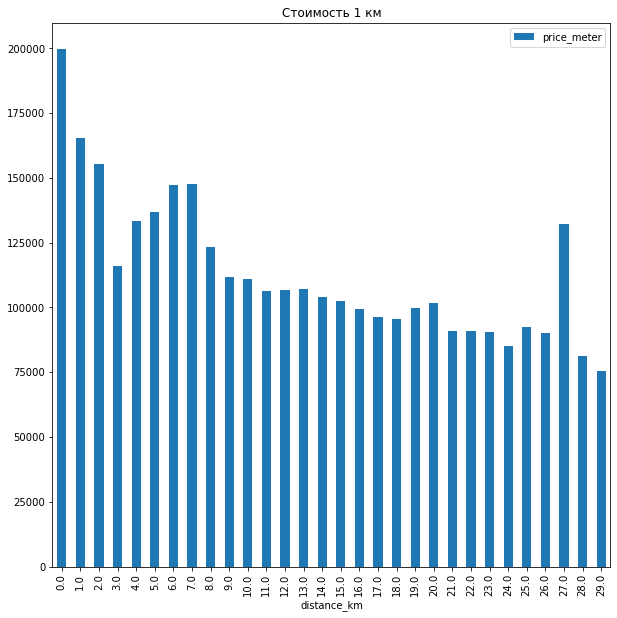

In [134]:
spb.plot(kind = 'bar',figsize = (10,10), title = 'Стоимость 1 км')

По графику видну, что чем больше дисатнция тем меньше  средняя стоимость киллометра.

### Общий вывод

За время проделанной  работы мы :
* редположили почему в данных могут быть пропуски 
* поменяли данные на нужный тип 
* странили неявные дубликаты в названиях населенных пунктов 
* узнали, что в данных не было явных дубликатов 
* обработали данные(при помощи ящиков с усами)  и убрали выбросы 
* добавили несколько столбцов для лучшего изучения данных 
* провели исследовательский анализ данных


Исходя из проделанной работы, на рыночную стоимость объекта сильнее всего влияет размер кухни и общая площадь, так же из отфильтрованных данных видно, что больше всего предложений с квадратурой в 50 м.кв.,жилая площадь составляет 25-30 кв.м.,двухкомнатные квартиры с высотой потолков в 2.65 метра.
Дни с минимальной стоимостью вторник, а самоя большая в субботу,в сентябре стоимость квартир выше,нежеле чем в марте,в 2017 годы стоимость квартир резко упал из-за меньшего предложения на квартиры большей квадротуры.

## Рекомендации

В качестве рекомендаций могу посоветовать более качественно подходить к тому, в каком формате продавец заполняет данные.То есть что бы облегчить в дальнейшем анализ, лучше усложнить критерии вводимых данных.Например высоту потолков необходимо заполнять в ячейке, которая сама приводит число в число с плавающей точкой и не давало вписать цифру больше какогото значения.